# Lab 3 - Linear Regression, Principal Component Analysis and Linear Discriminant Analysis
In this lab we look at utilizing Linear Regression, PCA and LDA. We will work on putting together the skeleton code to create the functionality of the algorithms, applying them to several different tasks.

For Linear Regression we will be loading in some 2D datapoints and fitting a linear regression model, before visualizing the resulting fit. 

For Principal Component Analysis and Linear Discriminant Analysis we will be analysing and reducing the feature space of the Wine dataset.

As usual, we will then look at using pre-implemented functionality for these tasks by using sklearn.

<b>Important note:</b> 
    Please do not edit the existing code snippets. Instead, add your functionality into the TODO sections. Read the entire skeleton structure first and think about how you should structure the code you are adding in carefully.
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Task 3.1 - Linear Regression
This task will load the example data from y_observations.npy and x_points.npy and fit a linear regression model to the data. We plot the development of the model training in each step. The following subtasks are:
1. Plot the data.
2. Select a number of iterations.
3. Selection a learning rate.
4. Plot the initial model prediction.
5. Calculate the predicted y values.
6. Update w0.
7. Update w1.

There are <b>11 TODOs</b> in this Task.

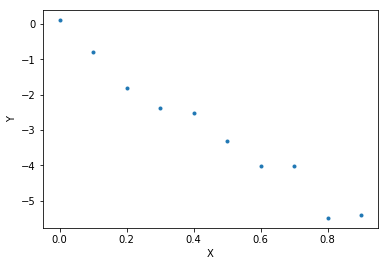

In [3]:
# Load the regression problem data
x = np.load('x_points.npy')
y = np.load('y_observations.npy')

# Plot the observed data
plt.scatter(x, y, marker='.')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

-> Iter: 0, Update w0: -1.33, Update w1: -0.81, MSE: 3.92439531


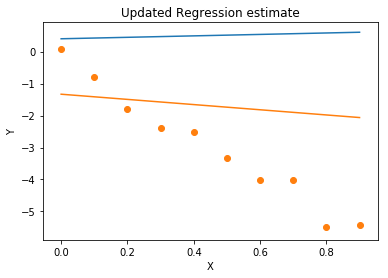

-> Iter: 50, Update w0: -0.66, Update w1: -5.19, MSE: 0.14116216


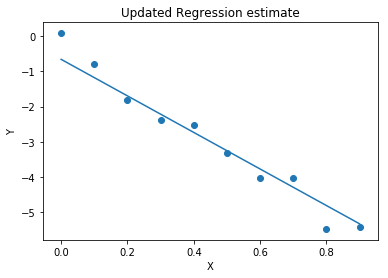

Final model: w0 = -0.33, w1 = -5.86, MSE = 0.08584261


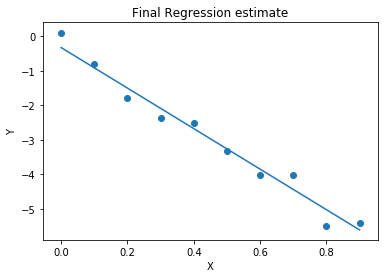

In [4]:
# Initialise starting parameters w0 and w1
w0 = np.random.rand()
w1 = np.random.rand()

# Select training hyper-parameters: number of iterations and learning rate control parameter alpha
number_of_iterations = 100
alpha = 0.5

# Plot initial linear regression estimate
plt.scatter(x, y, marker='.')
plt.plot(x, w0 + w1 * x)
plt.xlabel("x")
plt.ylabel("y")

# Iterate
for i_iteration in range(0, number_of_iterations):
    
    # Predicted Y values of X with current w0 and w1 parameters
    y_fit = w0 + w1 * x
    
    # Calculate difference between observed data and model's prediction
    y_diff = y_fit - y 
    
    # Calculate partial derivative of mean squares error with respect to w0
    pd_mse_w0 = np.sum(y_diff) / np.size(y)
    
    # Calculate partial derivative of mean squares error with respect to w1
    pd_mse_w1 = np.sum(y_diff * x) / np.size(y)
    
    # Update w0
    w0 = w0 - alpha * pd_mse_w0
    
    # Update w1
    w1 = w1 - alpha * pd_mse_w1
    
    # Calculate MSE 
    mse = np.mean(((w0 + w1 * x) - y) ** 2)
    
    # Print progress
    if (i_iteration % 50) == 0:
        print("-> Iter: {0}, Update w0: {1:.2f}, Update w1: {2:.2f}, MSE: {3:.8f}".format(i_iteration, w0, w1, mse))
        plt.scatter(x, y)
        plt.plot(x, w0 + w1 * x)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Updated Regression estimate')
        plt.show(block=False)
        
print("Final model: w0 = {0:.2f}, w1 = {1:.2f}, MSE = {2:.8f}".format(w0, w1, mse))
plt.scatter(x, y)
plt.plot(x, w0 + w1 * x)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Regression estimate')
plt.show(block=False)


## Task 3.2 Principal Component Analysis
This task will load the example data from wineData.npy and wineLabels.npy and perform Principal Component Analysis on the data in order to reduce the feature dimensionality of the problem. We first divide the dataset into a training and testing set and perform the PCA projection on each set. The following subtasks are:
1. Load the data and labels.
2. Plot the original dataset.
3. Divide the dataset into a testing and training set. 
4. Plot the two sets on the same figure. 
5. Mean-centre the training set for SVD.
6. Plot the percentage variance explained by each component. 
7. Select a number of components to keep based on the explained variance.
8. Create the projection matrix by slicing into Vt.
9. Project the training data into the Principal Component space.
10. Mean-centre and project the testing data into the Principal Component space.
11. Plot the training and testing set in the Principal Component space.

There are <b>24 TODOs</b> in this Task.

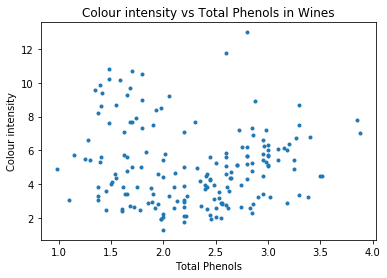

In [5]:
# Load in the Wine dataset
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')

# Plot two feature dimensions against eachother
plt.scatter(x[:,5], x[:,9], marker='.')
plt.xlabel("Total Phenols")
plt.ylabel("Colour intensity")
plt.title("Colour intensity vs Total Phenols in Wines")
plt.show()


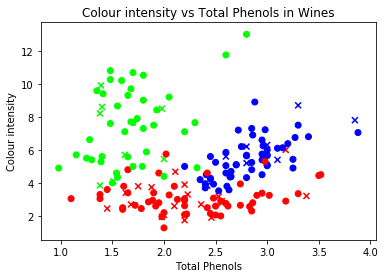

In [6]:
# Select data points to divide into a training and testing set
test_train_ratio = 0.2
testing_indices = np.random.choice(np.arange(x.shape[0]), int(x.shape[0] * test_train_ratio), replace=False)
training_indices = np.delete(np.arange(x.shape[0]), testing_indices)

# Divide the dataset into the two sets
test_data = x[testing_indices]
test_labels = y[testing_indices]
train_data = x[training_indices]
train_labels = y[training_indices]

# Plot the training samples, then plot the testing samples over the top with different marker shapes
plt.scatter(test_data[:,5],test_data[:,9], c=y[testing_indices], cmap='brg', marker='x')
plt.scatter(train_data[:,5],train_data[:,9], c=y[training_indices], cmap='brg', marker='o')
plt.xlabel("Total Phenols")
plt.ylabel("Colour intensity")
plt.title("Colour intensity vs Total Phenols in Wines")
plt.show()



In [7]:
# Perform PCA on the training data
mu = train_data.mean(axis=0)
centred_train_data = train_data - mu
U, S, Vt = np.linalg.svd(centred_train_data)

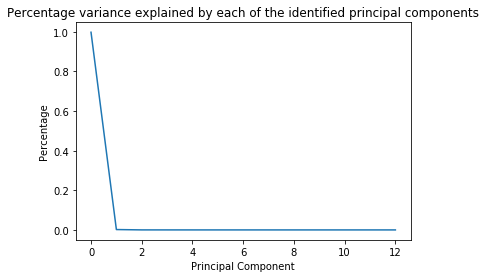

In [8]:
# Calculate the variance explained by each of the principal components. This may help you to select a number of
# principle components to keep
percentage_variance_explained = S**2 / np.sum(S**2)

# Plot the percentage variance explained by each of the principal component spaces
plt.figure()
plt.plot(percentage_variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Percentage')
plt.title('Percentage variance explained by each of the identified principal components')
plt.show(block=False)

In [9]:
# Select the number of components to keep and create the projection matrix
num_components = 1
projection_matrix =  Vt[0:num_components,:]

# Project the training data into the Principal Component space
projected_train_data = centred_train_data @ projection_matrix.T
#projected_train_data = np.dot(train_data, projection_matrix)

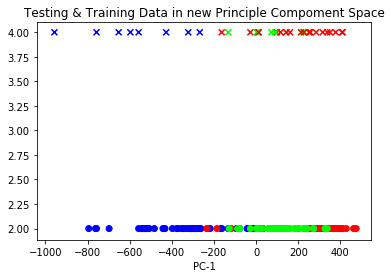

In [10]:
# Project the testing data into the Principal Component space
centred_test_data = test_data - test_data.mean(axis=0)

# Project the data into principal component space
projected_test_data = centred_test_data @ projection_matrix.T
#projected_test_data = np.dot(test_data, projection_matrix)
# Plot the training and testing data projected in the new Principal Component space
plt.figure()
plt.scatter(projected_train_data, np.zeros_like(projected_train_data) + 2, c=y[training_indices].reshape(-1, 1), cmap='brg', marker = 'o')
plt.scatter(projected_test_data, np.zeros_like(projected_test_data) + 4, c=y[testing_indices].reshape(-1, 1), cmap='brg', marker = 'x')
#plt.scatter(projected_train_data[:,0], projected_train_data[:,1], c=y[training_indices], cmap='brg', marker = 'o')
#plt.scatter(projected_test_data[:,0], projected_test_data[:,1], c=y[testing_indices], cmap='brg', marker = 'x')
plt.xlabel("PC-1")
#plt.ylabel("PC-2")
plt.title("Testing & Training Data in new Principle Compoment Space")
plt.show()

## Task 3.3 - Linear Discriminant Analysis
This task we will again load the example data from wineData.npy and wineLabels.npy and now we will perform Linear Discriminant Analysis on the data in order to reduce the feature dimensionality of the problem. The following subtasks are:
1. Load the data and labels.
5. Calculate the mean of each class in order to compute the within- and between-class scatter matrices.
6. Calculate and plot the percentage variance explained by each discriminant. 
7. Select a number of discriminants to keep based on the explained variance.
9. Project the data into the linear discriminant space.
11. Plot the data in the linear discriminant space.

There are <b>8 TODOs</b> in this Task.

In [11]:
# Load Wine data
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')

In [12]:
# Define some basic data properties
num_class = np.max(y) + 1
num_samples = x.shape[0]
num_features = x.shape[1]

# Calculate class sample counts
num_samples_in_class = np.zeros(num_class)
for i_class in range(num_class):
    num_samples_in_class[i_class] = x[y==i_class, :].shape[0]

# Calculate class means
mu = np.mean(x, axis=0)
mu_class = np.zeros((num_class, num_features))

for i_class in range(num_class):
    mu_class[i_class, :] = x[y==i_class, :].mean(axis=0)

In [13]:
# Define some basic data properties
num_class = np.max(y) + 1
num_samples = x.shape[0]
num_features = x.shape[1]

# Calculate class sample counts
num_samples_in_class = np.zeros(num_class)
for i_class in range(num_class):
    num_samples_in_class[i_class] = x[y==i_class, :].shape[0]

# Calculate class means
mu = np.mean(x, axis=0)
mu_class = np.zeros((num_class, num_features))
for i_class in range(num_class):
    mu_class[i_class, :] = x[y==i_class, :].mean(axis=0)

# Calculate within-class scatter matrix
Sw = np.zeros((num_features, num_features))
for i_class in range(num_class):
    Si = np.zeros((num_features, num_features))
    cluster_data = x[y==i_class, :]
    for i_data in range(cluster_data.shape[0]):
        centred_datapoint = cluster_data[i_data:i_data+1, :] - mu_class[i_class:i_class+1, :]
        Si += centred_datapoint.T @ centred_datapoint
    Sw += Si
    
# Calculate between-class scatter matrix
mu_class_mu = np.zeros((num_class, num_features))
for i_class in range(num_class):
    mu_class_mu[i_class, :] = mu_class[i_class, :] - mu
    
Sb = np.zeros((num_features, num_features))
for i_class in range(num_class):
    Sb += num_samples_in_class[i_class] * mu_class_mu[i_class:i_class+1, :].T @ mu_class_mu[i_class:i_class+1, :]

# Solve eigen decomposition for inv(Sw)Sb
eigvalues, eigvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Eig doesn't guarantee a sorted output, so sort the eigenvectors based on the eigenvalues
sorted_indices = np.argsort(eigvalues)[::-1]
eigvalues = eigvalues[sorted_indices]
eigvectors = eigvectors[:, sorted_indices]

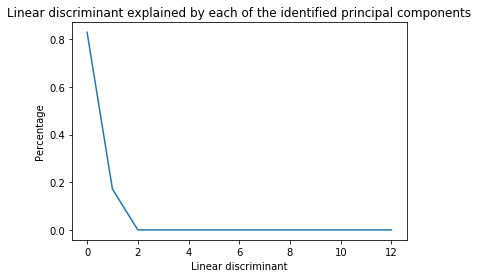

In [14]:
# Calculate the variance explained by each of the principal components
# TODO: Calculate the percentage variance explained by each of the linear discriminant spaces.

percentage_variance_explained = eigvalues**2 / np.sum(eigvalues**2)

# Plot the percentage variance explained by each of the linear discriminant spaces
plt.figure()
plt.plot(percentage_variance_explained.real)
plt.xlabel('Linear discriminant')
plt.ylabel('Percentage')
plt.title('Linear discriminant explained by each of the identified principal components')
plt.show(block=False)

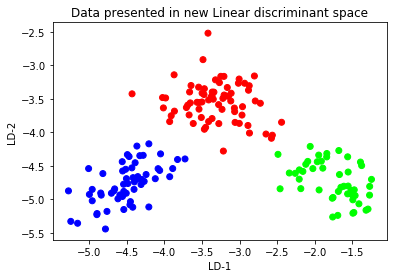

In [15]:
# Select the feature channels we want to keep based on the variance explained by the Linear Discriminant Analysis
n_dimensions = 2 # TODO: Select a number of discriminant spaces to keep.
projection_matrix = eigvectors[:, 0:n_dimensions].real 

# Project observed data into the new subspace
projected_data = x @ projection_matrix

# Plot data on new linear discriminant
# TODO: Plot the data projected onto the new linear discriminant space, label classes appropriately
# TODO: Give figure suitable axes labels and title
plt.figure()
plt.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap='brg', marker = 'o')
plt.xlabel("LD-1")
plt.ylabel("LD-2")
plt.title("Data presented in new Linear discriminant space")
plt.show()

# Using SciKit-Learn
In this section we will utilise SciKit-Learn and use the built-in API functionality to complete the tasks from above.

We will again perform Linear Regression on the toy data, and Principal Component Analysis and Linear Discriminant Analysis on the wine dataset.

We can use the <b>sklearn.linear_model.LinearRegression</b> object to fit a regression model to our toy data using the <i>fit</i> function.

We can use the <b>sklearn.decomposition.PCA</b> object to analyse the observed data and project it to the new principle component space using the <i>fit_transform</i> function. 

We can use the <b>sklearn.discriminant_analysis</b> object to analyse the observed data and project it to the new new discriminant space using the <i>fit_transform</i> function. 

There are <b>17 TODOs</b> in this Task.

Coefficient: -6.014868901482914


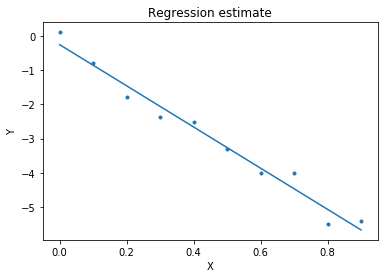

(178,)


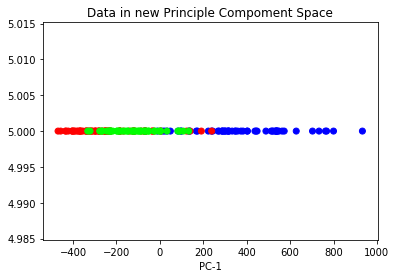

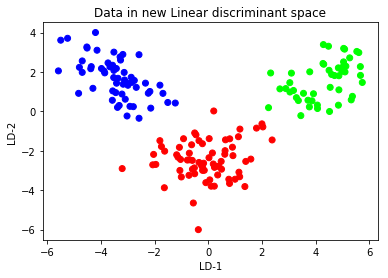

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Use sklearn for Linear Regression
x = np.load('x_points.npy')
y = np.load('y_observations.npy')
regr = LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))
print('Coefficient: ' + str(regr.coef_[0,0]))
#print('Intercept: ' + str(regr.predict(0)[0,0]))

plt.figure
plt.scatter(x, y, marker='.')
plt.plot(x, regr.predict(x.reshape(-1, 1)))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression estimate')
plt.show()

# Use sklearn for PCA
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')
print(y.shape)
pca = PCA(n_components=1)
pca.fit(x)
projected_data = pca.transform(x)
plt.figure()
plt.scatter(projected_data, np.zeros_like(projected_data) + 5, c=y.reshape(-1, 1), cmap='brg', marker = 'o')
#plt.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap='brg', marker = 'o')
plt.xlabel("PC-1")
#plt.ylabel("PC-2")
plt.title("Data in new Principle Compoment Space")
plt.show()

# Use sklearn for LDA
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x, y)
projected_data = lda.transform(x)
plt.figure()
plt.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap='brg', marker = 'o')
plt.xlabel("LD-1")
plt.ylabel("LD-2")
plt.title("Data in new Linear discriminant space")
plt.show()